In [ ]:
import numpy as np

# 입력 시퀀스의 타임스텝의 수
timesteps = 100
# 입력 특성의 차원
input_features = 32
# 출력 특성의 차원
output_features = 64

inputs = np.random.random((timesteps, input_features))

# 초기 상태 : 0벡터
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh( np.dot(W, input_t) + np.dot(U, state_t) + b )
    successive_outputs.append(output_t)
    state_t = output_t

# 최종 출력의 크기 : (timesteps, output_features) 2D tensor
final_output_sequence = np.stack(successive_outputs, axis=0)

In [ ]:
inputs.shape, state_t.shape

((100, 32), (64,))

In [ ]:
W.shape, U.shape, b.shape

((64, 32), (64, 64), (64,))

In [ ]:
len(inputs)

100

In [ ]:
len(successive_outputs)

100

In [ ]:
inputs[:2]

array([[0.20435616, 0.48575659, 0.34291913, 0.82190565, 0.4757628 ,
        0.53151261, 0.28362935, 0.53501762, 0.07601869, 0.96566945,
        0.06211834, 0.94607837, 0.9422623 , 0.34307559, 0.48564546,
        0.75895932, 0.59469701, 0.44092832, 0.94709071, 0.58019149,
        0.80676761, 0.42160123, 0.05907499, 0.28798424, 0.03849732,
        0.59712918, 0.05065614, 0.28880034, 0.91780012, 0.21565409,
        0.11035931, 0.06870883],
       [0.45889894, 0.68580071, 0.90212953, 0.40463982, 0.39525636,
        0.69628925, 0.60302907, 0.66308796, 0.53788607, 0.123564  ,
        0.94834575, 0.9418639 , 0.54719353, 0.50467984, 0.52709402,
        0.37666512, 0.74260826, 0.74583879, 0.4024754 , 0.76749889,
        0.80301989, 0.9526485 , 0.51634448, 0.73271802, 0.46372059,
        0.61001246, 0.55248982, 0.90566659, 0.33129279, 0.92223284,
        0.73950662, 0.19985927]])

In [ ]:
successive_outputs[:2]

[array([0.99999998, 0.99999979, 0.99999969, 0.99999995, 0.99999996,
        0.99999976, 0.99999957, 0.99999422, 0.99999844, 0.99999991,
        0.99999952, 0.99999848, 0.99999778, 0.99999997, 0.99999951,
        0.99999972, 0.99999999, 0.99999996, 0.99998836, 0.99999848,
        0.99999847, 0.99999998, 0.99999993, 0.99999999, 0.99999994,
        0.99999889, 0.99999881, 0.9999997 , 0.9999999 , 0.99999782,
        0.99999993, 0.99999973, 0.99999963, 0.99999977, 0.99999823,
        0.99999971, 0.99999993, 0.99999984, 0.99999943, 0.99999771,
        0.99999993, 0.99999995, 0.99998681, 0.99999807, 0.99999987,
        0.99999712, 0.99999774, 0.99999999, 0.99999993, 0.99999956,
        0.99999942, 0.99999997, 0.99999864, 0.9999992 , 0.99999993,
        0.9999997 , 0.99999928, 0.99999999, 0.99999957, 0.99999937,
        0.99999989, 0.99999975, 0.99999993, 0.99999966]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [ ]:
final_output_sequence.shape

(100, 64)

In [ ]:
final_output_sequence[0]

array([0.99999998, 0.99999979, 0.99999969, 0.99999995, 0.99999996,
       0.99999976, 0.99999957, 0.99999422, 0.99999844, 0.99999991,
       0.99999952, 0.99999848, 0.99999778, 0.99999997, 0.99999951,
       0.99999972, 0.99999999, 0.99999996, 0.99998836, 0.99999848,
       0.99999847, 0.99999998, 0.99999993, 0.99999999, 0.99999994,
       0.99999889, 0.99999881, 0.9999997 , 0.9999999 , 0.99999782,
       0.99999993, 0.99999973, 0.99999963, 0.99999977, 0.99999823,
       0.99999971, 0.99999993, 0.99999984, 0.99999943, 0.99999771,
       0.99999993, 0.99999995, 0.99998681, 0.99999807, 0.99999987,
       0.99999712, 0.99999774, 0.99999999, 0.99999993, 0.99999956,
       0.99999942, 0.99999997, 0.99999864, 0.9999992 , 0.99999993,
       0.9999997 , 0.99999928, 0.99999999, 0.99999957, 0.99999937,
       0.99999989, 0.99999975, 0.99999993, 0.99999966])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32)) # 마지막 타임스텝의 출력만 반환

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))  # 전체 상태 시퀀스를 반환

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_feature = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_feature)
print("훈련 시퀀스 {}, 테스트 시퀀스 {}".format(len(input_train), len(input_test)))

print('시퀀스 패딩 (samples * time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

훈련 시퀀스 25000, 테스트 시퀀스 25000
시퀀스 패딩 (samples * time)


In [ ]:
input_train.shape, input_test.shape

((25000, 500), (25000, 500))

In [ ]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/10
157/157 - 22s - loss: 0.6468 - acc: 0.6087 - val_loss: 0.4635 - val_acc: 0.8124
Epoch 2/10
157/157 - 21s - loss: 0.3858 - acc: 0.8416 - val_loss: 0.3752 - val_acc: 0.8456
Epoch 3/10
157/157 - 21s - loss: 0.2822 - acc: 0.8907 - val_loss: 0.4400 - val_acc: 0.7888
Epoch 4/10
157/157 - 21s - loss: 0.2266 - acc: 0.9136 - val_loss: 0.5499 - val_acc: 0.7344
Epoch 5/10
157/157 - 21s - loss: 0.1759 - acc: 0.9365 - val_loss: 0.4264 - val_acc: 0.8286
Epoch 6/10
157/157 - 21s - loss: 0.1324 - acc: 0.9535 - val_loss: 0.4132 - val_acc: 0.8322
Epoch 7/10
157/157 - 21s - loss: 0.0910 - acc: 0.9705 - val_loss: 0.6037 - val_acc: 0.7802
Epoch 8/10
157/157 - 21s - loss: 0.0658 - acc: 0.9776 - val_loss: 0.5306 - val_acc: 0.8114
Epoch 9/10
157/157 - 21s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.5791 - val_acc: 0.8242
Epoch 10/10
157/157 - 21s - loss: 0.0289 - acc: 0.9916 - val_loss: 0.5907 - val_acc: 0.8454


In [ ]:
def drawHistory(history):
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'ro', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

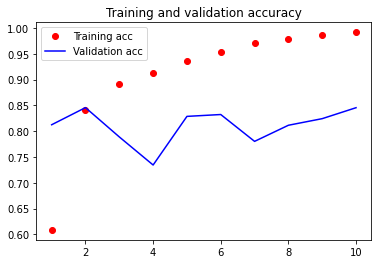

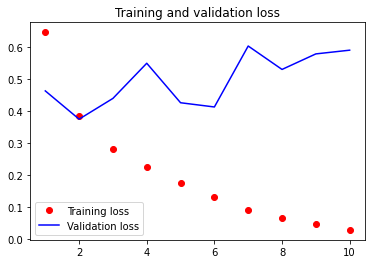

In [ ]:
drawHistory(history)

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/10
157/157 - 49s - loss: 0.5203 - acc: 0.7595 - val_loss: 0.3686 - val_acc: 0.8616
Epoch 2/10
157/157 - 47s - loss: 0.3064 - acc: 0.8820 - val_loss: 0.3181 - val_acc: 0.8694
Epoch 3/10
157/157 - 47s - loss: 0.2403 - acc: 0.9104 - val_loss: 0.4712 - val_acc: 0.8194
Epoch 4/10
157/157 - 47s - loss: 0.2020 - acc: 0.9241 - val_loss: 0.3143 - val_acc: 0.8660
Epoch 5/10
157/157 - 47s - loss: 0.1786 - acc: 0.9336 - val_loss: 0.4841 - val_acc: 0.8312
Epoch 6/10
157/157 - 47s - loss: 0.1581 - acc: 0.9426 - val_loss: 0.3770 - val_acc: 0.8740
Epoch 7/10
157/157 - 47s - loss: 0.1450 - acc: 0.9484 - val_loss: 0.5569 - val_acc: 0.8452
Epoch 8/10
157/157 - 47s - loss: 0.1348 - acc: 0.9538 - val_loss: 0.3104 - val_acc: 0.8844
Epoch 9/10
157/157 - 47s - loss: 0.1191 - acc: 0.9579 - val_loss: 0.3671 - val_acc: 0.8804
Epoch 10/10
157/157 - 47s - loss: 0.1100 - acc: 0.9618 - val_loss: 0.5115 - val_acc: 0.8686


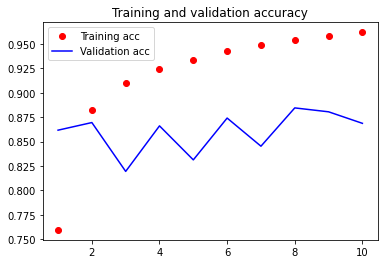

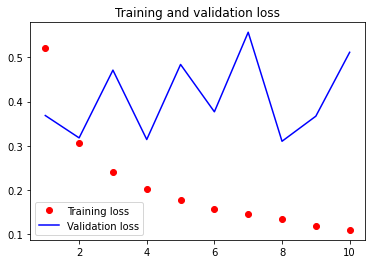

In [ ]:
drawHistory(history)